In [1]:
import pandas as pd
import scipy as scipy
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

In [2]:
from sklearn.ensemble import RandomForestRegressor

In [3]:
data3=pd.read_csv('data3.csv')

In [4]:
data3.head()

,hour,dateonly,link_points,id,hm,weekday,Coll_rate,speed
0,0,2018-01-01,"40.68036,-74.00441001 40.6822,-74.0057201 40.6...",124,30.636364,0.0,3.0,29.651818
1,0,2018-01-01,"40.6916,-73.99915 40.69236,-73.99939 40.69272,...",149,29.500000,0.0,3.0,35.982500
2,0,2018-01-01,"40.7016405,-73.991121 40.70158,-73.99033 40.70...",150,29.500000,0.0,3.0,7.348333
3,0,2018-01-01,"40.70631,-74.01501 40.705380,-74.01528 40.7049...",119,29.500000,0.0,3.0,37.900833
4,0,2018-01-01,"40.7081105,-73.99944 40.7084705,-73.99884 40.7...",145,29.500000,0.0,3.0,22.778333


In [5]:
df_coll=pd.read_csv('df_coll.csv')

In [6]:
#trying to visualize collisions with hour through folium

In [7]:
from folium.plugins import HeatMap
import folium

In [8]:
df_coll_copy = df_coll.dropna(subset=['latitude','longitude']).copy()
df_coll_copy['count'] = 1

In [9]:
def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [10]:
df_coll_copy['latitude']=df_coll_copy['latitude'].values
df_coll_copy['longitude']=df_coll_copy['longitude'].values

In [11]:
#base_map = generateBaseMap()
#HeatMap(data=df_coll_copy[['latitude', 'longitude', 'count']].values.tolist(), radius=8, max_zoom=13).add_to(base_map)

In [12]:
df_hour_list = []
for hour in df_coll_copy.hour.sort_values().unique():
    df_hour_list.append(df_coll_copy.loc[df_coll_copy.hour == hour, ['latitude', 'longitude', 'count']].values.tolist())


In [13]:
#Visualizing collisions across 2018 grouped by hour (ranging from 1 to 24).
from folium.plugins import HeatMapWithTime
base_map = generateBaseMap(default_zoom_start=11)
HeatMapWithTime(df_hour_list, radius=5, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
base_map

In [ ]:
#visualizing speed and collision rate hourly trends:

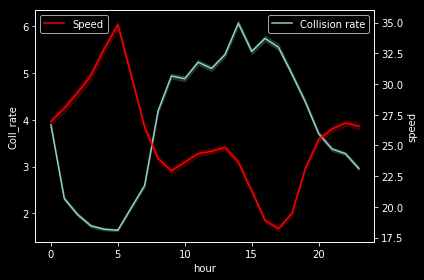

In [14]:
#sns.set(font_scale=1.0)
#import seaborn as sns

#fig=plt.figure()
#with plt.style.context('dark_background'):
plt.style.use("dark_background")
    #fig=plt.figure()
ax=sns.lineplot(x="hour",y="Coll_rate",data=data3,label="Collision rate")
ax.grid(False)
ax2 = ax.twinx()
ax2.grid(False)
sns.lineplot(x="hour",y="speed",data=data3,color="red",label="Speed",ax=ax2)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('speed-coll.pdf')

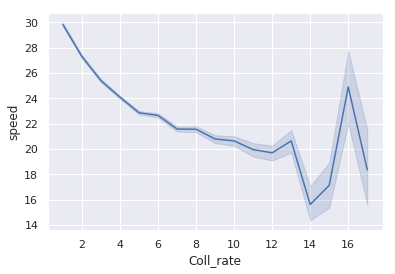

In [356]:
sns.lineplot(x="Coll_rate",y="speed",data=data3)

In [323]:
#predicting speed

In [11]:
features=data3[['hour','weekday','Coll_rate','id']]
labels=data3['speed']

In [ ]:
#tts, cross-validation, etc...

In [12]:
# Training and Testing Sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 42)

In [13]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
#{'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],
# 'n_estimators': [10,20,30,40,50]}

{'n_estimators': [5, 26, 48, 70, 91, 113, 135, 156, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [14]:
rf = RandomForestRegressor(random_state = 42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 10)
# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=26, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=26, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=26, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=113, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV] n_estimators=113, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV] n_estimators=113, min_samples

[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   24.9s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=  24.2s
[CV] n_estimators=26, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=91, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, total=  12.3s
[CV] n_estimators=26, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=26, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total=   4.5s
[CV] n_estimators=70, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=26, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total=   2.2s
[CV] n_estimators=70, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=200, min_samples

[CV]  n_estimators=178, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=  22.1s
[CV] n_estimators=156, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=178, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=  21.6s
[CV] n_estimators=135, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=178, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=  13.1s
[CV] n_estimators=135, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=178, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False, total=  22.1s
[CV] n_estimators=135, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=178, min_

[CV]  n_estimators=113, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=  12.5s
[CV] n_estimators=70, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   5.8s
[CV] n_estimators=70, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=113, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   8.1s
[CV] n_estimators=70, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   5.8s
[CV] n_estimators=178, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=70, min_samples

[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=  15.0s
[CV] n_estimators=5, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=5, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   0.6s
[CV] n_estimators=5, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=26, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   1.4s
[CV] n_estimators=91, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=48, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   2.5s
[CV] n_estimators=91, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=5, min_samples_split

[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:  2.6min


[CV]  n_estimators=113, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   8.7s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=113, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   8.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=113, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   8.4s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=48, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total=   8.1s
[CV] n_estimators=91, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=200, m

[CV]  n_estimators=135, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total=   7.3s
[CV] n_estimators=91, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=135, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=  13.5s
[CV] n_estimators=91, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=135, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total=   7.1s
[CV] n_estimators=113, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=135, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=  13.5s
[CV]  n_estimators=135, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total=   7.1s
[CV] n_est

[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   5.0s
[CV] n_estimators=26, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=135, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=   9.9s
[CV] n_estimators=156, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=26, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=   3.8s
[CV] n_estimators=156, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=26, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=   3.7s
[CV] n_estimators=156, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=26, min_samples_

[CV]  n_estimators=70, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   8.4s
[CV] n_estimators=48, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=91, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True, total=   9.3s
[CV] n_estimators=48, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=70, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   8.4s
[CV] n_estimators=48, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=70, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   8.8s
[CV] n_estimators=26, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=70, m

[CV]  n_estimators=26, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total=   3.1s
[CV] n_estimators=91, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=48, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=   3.7s
[CV] n_estimators=91, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=48, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=   3.5s
[CV] n_estimators=5, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=5, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   0.6s
[CV] n_estimators=5, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=48, min_samples_

[Parallel(n_jobs=10)]: Done 300 out of 300 | elapsed:  5.8min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=10,
          param_distributions={'n_estimators': [5, 26, 48, 70, 91, 113, 135, 156, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [15]:
rf_random.best_params_


{'n_estimators': 70,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [18]:
best_random = rf_random.best_estimator_
pred=best_random.predict(test_features)
print(scipy.stats.pearsonr(pred,test_labels)[0])

0.806881778998975


In [321]:
#visualizing prediction

<Figure size 432x288 with 0 Axes>

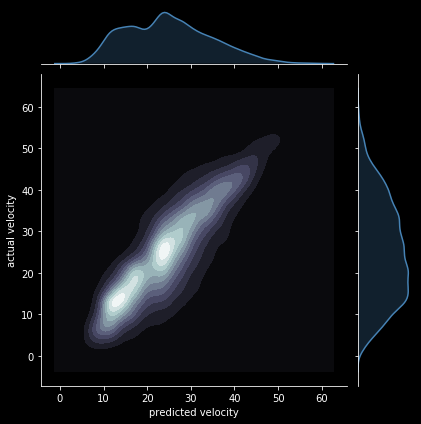

In [21]:
jointplotdata=pd.DataFrame({'predicted velocity':pred[test_labels<60],'actual velocity':test_labels[test_labels<60]})
fig=plt.figure()
with plt.style.context('dark_background'):
    #with plt.style.context('seaborn-pastel'):
    kdefig=sns.jointplot(x="predicted velocity",y='actual velocity',data=jointplotdata,kind='kde',cmap='bone',color='steelblue')
    #hexplot = sns.jointplot(x, y, kind="hex")
    #plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
    #cax = kdefig.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
    #plt.colorbar(cax=cax)
    
    #plt.xlim(0,50)
    #plt.ylim(0,50)
    plt.savefig('vel-pred-coll.pdf')

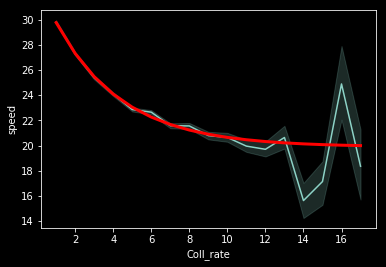

In [15]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
popt, pcov = curve_fit(func, data3['Coll_rate'],data3['speed'])

sns.lineplot(x="Coll_rate",y="speed",data=data3)
plt.grid(False)
plt.plot(np.linspace(1,17,17),func(np.linspace(1,17,17),*popt),'r-',linewidth=3)
plt.savefig('speed-coll-pred.pdf')

In [154]:
#now visualizing speeds

In [193]:
dfNodes = pd.DataFrame(data3[['link_points','id']])

In [194]:
dfNodes = dfNodes.drop_duplicates().reset_index(drop=True)

In [195]:
# Splitting the column containing all Lat/Long combinations
dfNodes['splitPoints'] = dfNodes['link_points'].apply(lambda x: x.split(' '))

# Reshaping our data frame to have a row for each Lat/Long point
idNodes = []
for x,y in zip(dfNodes['splitPoints'], dfNodes['id']):
    for a in np.arange(len(x)):
        idNodes.append((y, x[a]))
dfNodes = pd.DataFrame(idNodes, columns=['id', 'LatLong'])

dfNodes = dfNodes.replace('', np.NaN).dropna()

# Parsing Lat/Long into individual columns
# Longitude has an if statement since some records contain '-' for longitude
dfNodes['Latitude'] = dfNodes['LatLong'].apply(lambda x: x.split(',')[0])
dfNodes['Longitude'] = dfNodes['LatLong'] \
    .apply(lambda x: x.split(',')[1] if len(x.split(',')) > 1 else None)

# Dropping incorrect longitude records and converting everything to floats
dfNodes = dfNodes[dfNodes['Longitude'] != '-'][['id', 'Latitude', 'Longitude']].astype(float)
dfNodes = dfNodes.dropna()

In [196]:
dfNodes=dfNodes.groupby(['id']).mean().reset_index(drop=True)

In [197]:
dfNodes

,Latitude,Longitude
0,40.750123,-68.852984
1,40.734298,-74.010392
2,40.755592,-74.004280
3,40.766622,-74.098227
4,40.769012,-73.995559
5,40.694716,-74.011652
6,40.694201,-74.011339
7,40.708710,-73.997887
8,40.695191,-73.990913
9,40.705254,-73.911048


In [180]:
dfNodes['count']=1

In [198]:
locations = dfNodes[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()

In [199]:
len(dfNodes)

26

In [ ]:
#This heatmap shows along with collisions, also location of speed detectors (in blue)

In [212]:
#base_map = generateBaseMap()
for point in range(0, len(dfNodes)):
    folium.Marker(locationlist[point]).add_to(base_map)
base_map